# Visualise the business value of predictive models

*This article is part of our series about how different types of data scientists build similar models differently. No human is the same and therefore also no data scientist is the same. And the circumstances under which a data challenge needs to be handled change constantly. For these reasons, different approaches can and will be used to complete the task at hand. In our series we will explore the four different approaches of our data scientists - Meta Oric, Aki Razzi, Andy Stand, and Eqaan Librium. They are presented with the task to build a model to predict whether employees of a company - STARDATAPEPS - will look for a new job or not. Based on their distinct profiles discussed in the <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">first blog</a> you can already imagine that their approaches will be quite different.*

*In this article we will discuss how to assess the business value of a predictive model, like the ones developed in our series. Especially Andy Stand recognizes the importance of being able to explain his models in business terms, so that the business understands how to turn the model into value.*

### Andy Stand : *'Understand is what we do'* 

!['Andy Stand'](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/Andy%20Stand_400px.png)

Remember Andy Stand from our <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">intro blog</a>? Andy does not believe that black-box models are the future. He often finds himself in a meeting where he needs to explain to his colleagues how his model works and how the predictions are generated. He is happy to sacrifice a bit of accuracy in order to achieve the most clear and understandable solution. He makes sure that his planning allows for extensive feature engineering. As a result, all of his features can be understood and explained to others. Simple regressions and decision trees are the most utilised tools from his toolbox.

### Why Andy thinks ROC curves are a bad idea to explain your model to business people

![An attempt to explain the ROC curve to business..](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/cartoonrocplot_600px.png)

> ‘...And as we can see clearly on this ROC plot, the sensitivity of the model at the value of 0.2 on one minus the specificity is quite high! Right?...’.

Andy has a strong opinion on using the ROC plot to explain a model to non-technical colleagues: *'If your fellow business colleagues didn't already wander away during your presentation about your fantastic predictive model, it will definitely push them over the edge when you start talking like this. Why? Because the ROC curve is not easy to quickly explain and also difficult to translate into answers on the business questions your business colleagues have. They are mainly focused on answering questions like *Does this model enable us to better target our target audience? How much better are we doing, using this model compared to what we do now? What will the expected response on our campaign be?* And these business questions were the reason you've built a model in the first place!'*

During our model building efforts, we should already be focused on verifying how well the model performs. Often, we do so by training the model parameters on a subset of records and test the performance on a holdout set. We look at performance measures like the ROC curve and the AUC value to decide on the best model version for the task at hand. These plots and statistics are very helpful to check during model building and optimization whether your model is under- or overfitting and what set of parameters performs best on test data. However, these statistics are not that valuable in explaining the business value of the model to your business stakeholders.

One reason that the ROC curve is not that useful in explaining the business value of your model, is because it's quite hard to explain the interpretation of ‘area under the curve', ‘specificity' or ‘sensitivity' to business people. Another important reason that these statistics and plots are useless in your business meetings is that they don't help in determining how to apply your predictive model: What percentage of records should we select based on the model? Should we select only the best 10% of cases? Or should we stop at 30%? Or go on until we have selected 70%?... This is something you want to decide together with your business colleagues to best match the business plans and campaign targets they have to meet. The four plots - cumulative gains, cumulative lift, response and cumulative response - we are about to introduce are in our view the best ones for that cause.

### Four plots Andy uses to explain predictive models to business people
Andy strongly advocates four different plots to assess a predictive model's business value:
- Gains plot
- Lift plot
- Response plot
- Cumulative response plot

Although each plot sheds light on the business value of your model from a different angle, they all use the same data:
- Predicted probability for the target class
- Equally sized groups based on this predicted probability
- Actual number of observed target class observations in these groups

It's common practice to split the dataset with predictions into 10 equally large groups and call these groups deciles. Observations that belong to the top-10% with highest model probability in a set, are in decile 1; the next group of 10% with high model probability are decile 2 and finally the 10% observations with the lowest model probability on the target class belong to decile 10.

Each of our four plots places the deciles on the x axis and another measure on the y axis. The deciles are plotted from left to right so the observations with the highest model probability are on the left side of the plot. This results in plots like this:

![decile plot](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/decileplot_600px.png)

Now that it's clear what is on the horizontal axis of each of the plots, we can go into more detail on the metrics for each plot on the vertical axis. For each plot, we'll start with a brief explanation what insight you gain with the plot from a business perspective. After that, we'll apply it to our predictive models to predict what employees are most likely to leave the company.

### modelplotpy: a brief introduction
There are many packages and pieces of code to be found on the web to create the plots we are about to discuss. Andy strongly prefers the [**modelplotpy**](https://modelplot.github.io/intro_modelplotpy.html) package since this one contains all the plots he prefers and enables him to annotate the plots to explain the model to business colleagues. Modelplotpy can be used to compare the performance of different models (e.g. Meta's or Aki's XGB model), on different datasets (e.g. train vs test), and with different target classes (eg. 0 or 1 ). After setting the scope of your analysis, you can plot and annotate the different plots discussed in the next sections. It can be installed as follows:

In [0]:
import warnings 
warnings.filterwarnings(action= 'ignore')

In [0]:
pip install git+https://github.com/modelplot/modelplotpy.git

Python interpreter will be restarted.
Collecting git+https://github.com/modelplot/modelplotpy.git
 Cloning https://github.com/modelplot/modelplotpy.git to /tmp/pip-req-build-fsbijxt0
 Running command git clone -q https://github.com/modelplot/modelplotpy.git /tmp/pip-req-build-fsbijxt0
Building wheels for collected packages: modelplotpy
 Building wheel for modelplotpy (setup.py): started
 Building wheel for modelplotpy (setup.py): finished with status 'done'
 Created wheel for modelplotpy: filename=modelplotpy-1.0.0-py2.py3-none-any.whl size=35816 sha256=5ac15f586d4238290cacd0c2c70f27f107ec0f268c6edbb2d32a8bc6af6e5d89
 Stored in directory: /tmp/pip-ephem-wheel-cache-3etasv6m/wheels/20/ff/0e/6cec0a182940d5f1f84dac3946ac8860adf8d25962ab34601e
Successfully built modelplotpy
Installing collected packages: modelplotpy
Successfully installed modelplotpy-1.0.0
WARNING: You are using pip version 21.0.1; however, version 22.0.3 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

### load data and models to compare
Now we can load the data we prepared <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-data-to-predict-which-employees-are-likely-to-leave" target="_blank" rel="noopener noreferrer">earlier</a> and <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-good-model-by-default-using-xgboost" target="_blank" rel="noopener noreferrer">Meta's</a> and <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-hyperparameter-tuning-for-hyperaccurate-xgboost-model" target="_blank" rel="noopener noreferrer">Aki's</a> previously built and saved models.

In [0]:
pip install xgboost

Python interpreter will be restarted.
Collecting xgboost
 Using cached xgboost-1.5.2-py3-none-manylinux2014_x86_64.whl (173.6 MB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.19.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.6.2)
Installing collected packages: xgboost
Successfully installed xgboost-1.5.2
WARNING: You are using pip version 21.0.1; however, version 22.0.3 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import pandas as pd
df_prep = pd.read_csv('https://bhciaaablob.blob.core.windows.net/featurenegineeringfiles/df_prepared.csv')

In [0]:
# Load the models:  
import joblib
from urllib.request import urlopen
import xgboost as xgb
from sklearn.model_selection import train_test_split

# prepare data for training & evaluation
df = df_prep.drop(columns=['Unnamed: 0','city', 'experience', 'enrollee_id'])  


# Define the target vector y
y = df['target']  

# Creating a dataset without the DV:
X = df.drop('target', axis = 1)

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, stratify=y, random_state=1121218 
)

# Creating an object with the column labels of only the categorical features and one with only the numeric features:
categorical_features = X.select_dtypes(exclude="number").columns.tolist()
numeric_features = X.select_dtypes(include="number").columns.tolist()

# import model pipelines
xgb_meta = joblib.load(urlopen('https://bhciaaablob.blob.core.windows.net/featurenegineeringfiles/pipe_meta.joblib')) 
xgb_aki = joblib.load(urlopen('https://bhciaaablob.blob.core.windows.net/featurenegineeringfiles/best_pipe_aki.joblib'))



In [0]:
# Importing packages and settings: 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

### 1. Cumulative gains plot
The cumulative gains plot - often named 'gains plot' - helps you answer the question:

> When we apply the model and select the best X deciles, what % of the actual target class observations can we expect to target?

Hence, the cumulative gains plot visualises the percentage of the target class members you have selected if you would decide to select up until decile X. This is a very important business question, because in most cases, you want to use a predictive model to target a subset of observations - customers, prospects, cases,... - instead of targeting all cases. And since we won't build perfect models all the time, we will miss some potential. And that's perfectly fine, because if we are not willing to accept that, we should not use a model in the first place. Or build a perfect model, that scores all actual target class members with a 100% probability and all the cases that do not belong to the target class with a 0% probability. However, if you're such a wizard, you don't need these plots any way or you should have a careful look at your model - maybe you're cheating?....

So, we'll have to accept we won't be able to target perfectly. What percentage of the actual target class members you do select with your model at a given decile, that's what the cumulative gains plot tells you. The plot often comes with two reference lines to tell you how good/bad your model is doing: The random model line and the wizard model line. The random model line tells you what proportion of the actual target class you would expect to select when no model is used at all. This vertical line runs from the origin (with 0% of the cases, you have 0% of the actual target class members) to the upper right corner (with 100% of the cases, you have 100% of the target class members). It's the rock bottom of how your model can perform; are you close to this, then your model is not much better than a coin flip. The wizard model is the upper bound of what your model can do. It starts in the origin and rises as steep as possible towards 100%. If less than 10% of all cases belong to the target category, this means that it goes steep up from the origin to the value of decile 1 and cumulative gains of 100% and remains there for all other deciles as it is a cumulative measure. Your model will always move between these two reference lines - closer to a wizard is always better - and looks like this:

![cumulative gains plot](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/cumgainsplot_600px.png)

Now let's use the cumulative gains plot to see how well Meta and Aki did in predicting which employees are likely to leave the company.  And how much of potential 'leavers' are missed when - say - a campaign to keep colleagues on board is initiated for the 30% of colleagues that have the highest probability to leave. By targeting only the top 30% investments in this retention campaign are minimized whereas hopefully most of the expected leavers are still targeted. Whether this 30% is actually the right threshold can be evaluated with the plots we'll discuss.

We first need to create a plotting scope object: We specify the data and models we want to use and the scope we are interested in: comparing performance of models on the test dataset.

In [0]:
import modelplotpy as mp
obj = mp.modelplotpy(feature_data = [X_train, X_test]
                     , label_data = [y_train, y_test]
                     , dataset_labels = ['train data', 'test data']
                     , models = [xgb_meta, xgb_aki]
                     , model_labels = ['Meta`s XGB', 'Aki`s XGB']
                     )

# transform data generated with prepare_scores_and_deciles into aggregated data for chosen plotting scope 
ps = obj.plotting_scope(scope='compare_models',select_dataset_label = ['test data'],select_targetclass=[1])

compare models

Now, we can plot the cumulative gains chart to compare the difference in how many of all employees that are about to leave are actually in the selection based on the model, if we would only select the top 30% based on the model:

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:658: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:658: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
When we select 30% with the highest probability according to model Aki`s XGB, this selection holds 69% of all 1 cases in dataset test data.
When we select 30% with the highest probability according to model Meta`s XGB, this selection holds 66% of all 1 cases in dataset test data.
The cumulative gains plot is saved in /databricks/driver/Cumulative gains plot.png

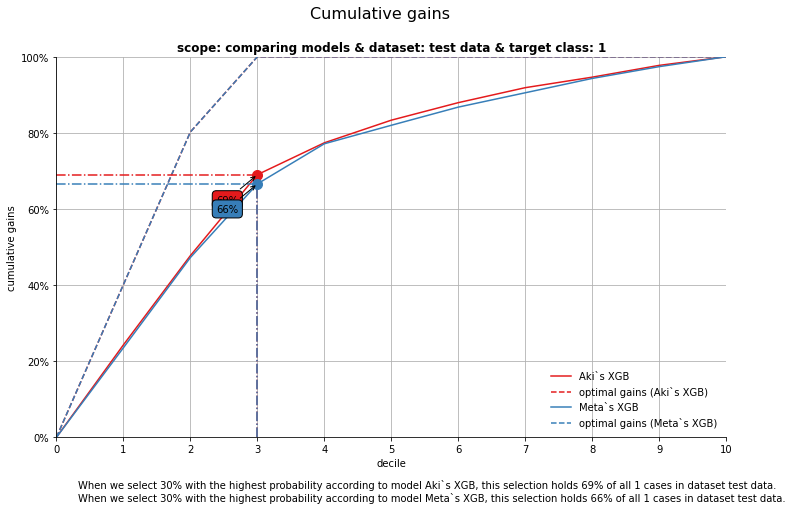

In [0]:
# plot the cumulative gains plot and annotate the plot at decile = 3
_ = mp.plot_cumgains(ps, highlight_ntile = 3)

This plot (as well as the annotation) shows that if we use either Meta's or Aki's XGB model it results in selecting about 2/3 of all employees that are likely to leave by only selecting 30% of all employees for a possible employee retention program. We also see that Aki's parameter tuning resulted in a slightly better model and that using her model would result in targeting slightly more of the acutally leaving employees.

### 2. Cumulative lift plot
The cumulative lift plot, often referred to as lift plot or index plot, helps you answer the question:

> When we apply the model and select the best X deciles, how many times better is that than using no model at all?

The lift plot helps you in explaining how much better selections based on your model are compared to taking random selections instead. Especially when models are not yet used within a certain organisation or domain, this really helps the business to understand what selecting targets based on your model can do for them.

The lift plot only has one reference line: the 'random model'. With a random model we mean that each observation gets a random number and all cases are divided into deciles based on these random numbers. The % of actual target category observations in each decile would be equal to the overall % of actual target category observations in the total set. Since the lift is calculated as the ratio of these two numbers, we get a horizontal line at the value of 1. Your model should however be able to do better, resulting in a high ratio for decile 1. How high the lift can get, depends on the quality of your model, but also on the % of target class observations in the data: If 50% of your data belongs to the target class of interest, a perfect model would only do twice as good (lift: 2) as a random selection. With a smaller target class value, say 10%, the model can potentially be 10 times better (lift: 10) than a random selection. Therefore, we can not specify a general guideline of a 'good' lift. Towards decile 10, since the plot is cumulative, with 100% of cases, we have the whole set again and therefore the cumulative lift will always end up at a value of 1. It looks like this:

![cumulative lift plot](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/cumliftplot_600px.png)

This is what the lift plot looks like for Meta's and Aki's models:

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:486: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:486: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
When we select 30% with the highest probability according to model Aki`s XGB in dataset test data, this selection for target class 1 is 2.3 times than selecting without a model.
When we select 30% with the highest probability according to model Meta`s XGB in dataset test data, this selection for target class 1 is 2.22 times than selecting without a model.
The cumulative lift plot is saved in /databricks/driver/Cumulative lift plot.png

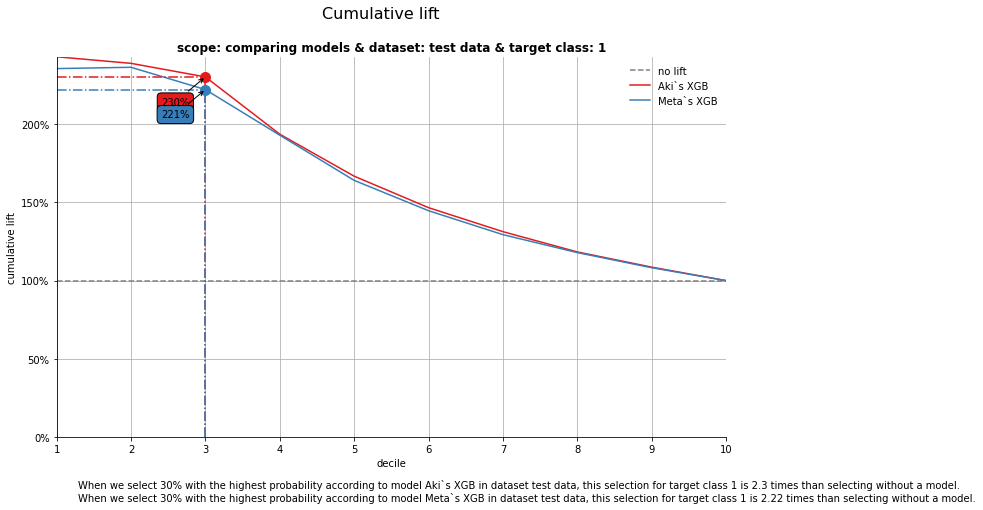

In [0]:
# plot the cumulative lift plot and annotate the plot at decile = 3
_ = mp.plot_cumlift(ps, highlight_ntile = 3)

Hence, both models more than double the quality of the selection, when compared to randomly selecting 30% of all employees for the employee retention program.

### 3. Response plot
One of the easiest to explain evaluation plots is the response plot. It simply plots the percentage of target class observations per decile. It can be used to answer the following business question:

> When we apply the model and select decile X, what is the expected % of target class observations in that decile?

The plot has one reference line: The % of target class cases in the total set. It looks like this:

![response plot](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/responseplot_600px.png)

A good model starts with a high response value in the first decile(s) and suddenly drops quickly towards 0 for later deciles. This indicates good differentiation between target class members - getting high model scores - and all other cases. An interesting point in the plot is the location where your model's line intersects the random model line. From that decile onwards, the % of target class cases is lower than a random selection of cases would hold.

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:144: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:144: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
When we select decile 3 from model Aki`s XGB in dataset test data the percentage of 1 cases in the selection is 53%.
When we select decile 3 from model Meta`s XGB in dataset test data the percentage of 1 cases in the selection is 48%.
The response plot is saved in /databricks/driver/Response plot.png

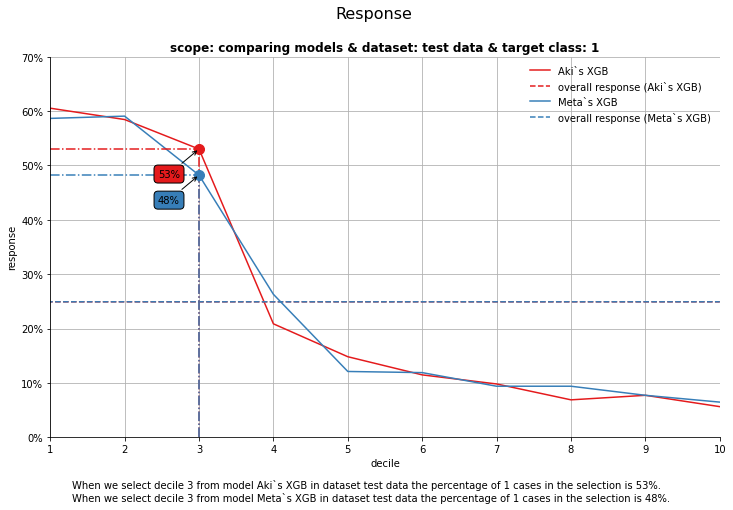

In [0]:
# plot the response plot and annotate the plot at decile = 3
_ = mp.plot_response(ps, highlight_ntile = 3)

With the response plot we get per-decile insights in the quality of the model. For Aki's model, the first three deciles consist of actual leavers for more than 50%. For Meta's model we see that - whereas the % of actual leavers is above 50% in the first two deciles, it is just below that in decile 3. This insight might help in deciding which model to choose and whether or not to include decile 3 in the selection based on this model.

### 4. Cumulative response plot
Finally, one of the most used plots: The cumulative response plot. It answers the question burning on each business reps lips:

> When we apply the model and select up until decile X, what is the expected % of target class observations in the selection?

The reference line in this plot is the same as in the response plot: the % of target class cases in the total set.

![cumulative response plot](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/cumresponseplot_600px.png)

Whereas the response plot crosses the reference line, in the cumulative response plot it never crosses it but ends up at the same point for decile 10: Selecting all cases up until decile 10 is the same as selecting all cases. This plot is most often used to decide - together with business colleagues - up until what decile to select for a campaign.

/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:314: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-4492bc04-bf02-495e-8d69-f39b55134ebf/lib/python3.8/site-packages/modelplotpy/functions.py:314: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
 ax.plot(xy[0], xy[1], ".r", ms = 20, color = colors[col])
When we select deciles 1 until 3 according to model Aki`s XGB in dataset test data the percentage of 1 cases in the selection is 57%.
When we select deciles 1 until 3 according to model Meta`s XGB in dataset test data the percentage of 1 cases in the selection is 55%.
The cumulative response plot is saved in /databricks/driver/Cumulative response plot.png

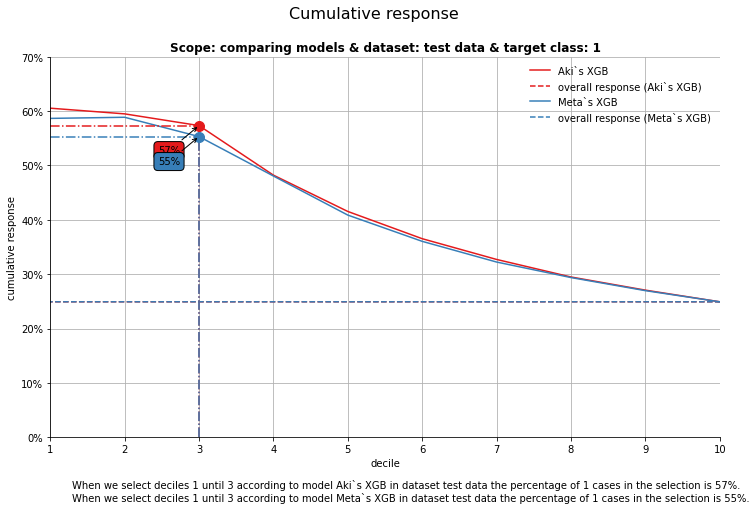

In [0]:
# plot the response plot and annotate the plot at decile = 3
_ = mp.plot_cumresponse(ps, highlight_ntile = 3)

So, by selecting up until the third  decile based on Meta's model, the expected % of employees that is planning to leave is in total 55% for Meta's model and 57% for Aki's model. Knowing the expected percentage of employees in the selection that is likely to leave might really help business colleagues in the investments they are willing to do in the employee retention program. This is why Andy is so much in favor of this and the previous plots. Together they tell the story of what the value of the predictive model is and how to use it to achieve business goals.

![plots business colleagues understand](https://bhciaaablob.blob.core.windows.net/featureengineeringreeks/characters/cartoonmodelplot_600px.png)

With these plots, Andy is able to talk with business colleagues about the actual value of his predictive models, without having to bore them with technicalities and nitty gritty details. He is able to translate his model in business terms and visualizes it to simplify interpretation and communication. Hopefully, these plots also help many of you in discussing how to optimally take advantage of your predictive model building efforts.

Overview of links to blogs:
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-introducing-our-data-science-rock-stars" target="_blank" rel="noopener noreferrer">Introducing our data science rock stars</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-data-to-predict-which-employees-are-likely-to-leave" target="_blank" rel="noopener noreferrer">Data to predict which employees are likely to leave</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-good-model-by-default-using-xgboost" target="_blank" rel="noopener noreferrer">Good model by default using XGBoost</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-hyperparameter-tuning-for-hyperaccurate-xgboost-model" target="_blank" rel="noopener noreferrer">Hyperparameter tuning for hyperaccurate XGBoost model</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-beat-dirty-data" target="_blank" rel="noopener noreferrer">Beat dirty data</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-the-case-of-high-cardinality-kerfuffles" target="_blank" rel="noopener noreferrer">The case of high cardinality kerfuffles</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-guide-to-manage-missing-data" target="_blank" rel="noopener noreferrer">Guide to manage missing data</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same-visualise-the-business-value-of-predictive-models" target="_blank" rel="noopener noreferrer">Visualise the business value of predictive models</a>
1. <a href="https://www.theanalyticslab.nl/no-data-scientist-is-the-same" target="_blank" rel="noopener noreferrer">No data scientist is the same!</a>